# Assignment 7.2: Clustering Sales Data Using K-Means
# Ziyad Salem
## Objective
The objective of this assignment is to apply K-Means clustering to a weekly sales transaction dataset in order to identify groups of products with similar sales behavior. Since no product metadata is available, clustering is performed solely based on numerical sales patterns.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Applied-Artificial-Intelligence-Workshop/master/Datasets/Sales_Transactions_Dataset_Weekly.csv'
df = pd.read_csv(file_url)

df.head()


,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


## Initial Data Inspection
The dataset consists of weekly sales figures for 800 products across one year. No categorical or descriptive product information is available, making this a suitable candidate for unsupervised clustering.



In [5]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB


,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.00000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,0.299149,0.287571,0.304846,0.316017,0.334760,0.314636,0.33815,0.358903,0.373009,0.427941
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,0.266993,0.256630,0.263396,0.262226,0.275203,0.266029,0.27569,0.286665,0.295197,0.342360
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020000,0.085000,0.000000,0.10500,0.100000,0.110000,0.090000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,0.280000,0.270000,0.300000,0.310000,0.330000,0.310000,0.33000,0.330000,0.350000,0.430000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,0.490000,0.450000,0.500000,0.500000,0.500000,0.500000,0.50000,0.550000,0.560000,0.670000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [6]:
sales_data = df.drop(columns=['Product_Code'], errors='ignore')


Product identifiers were removed since clustering should be based only on sales behavior.


In [7]:
scaler = StandardScaler()
sales_scaled = scaler.fit_transform(sales_data)


Standardization was applied to ensure that weekly sales values contribute equally to distance calculations in K-Means.


In [8]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sales_scaled)
    inertia.append(kmeans.inertia_)


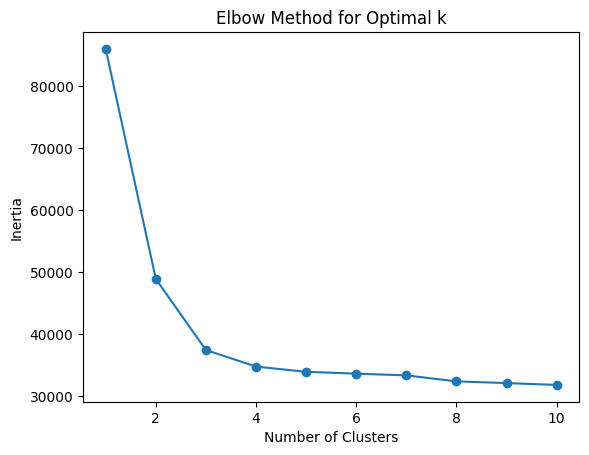

In [9]:
plt.figure()
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(sales_scaled)


In [11]:
df['Cluster'] = clusters
df.head()


,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51,Cluster
0,P1,11,12,10,8,13,12,14,21,6,...,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39,0
1,P2,7,6,3,2,7,1,6,3,3,...,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00,1
2,P3,7,11,8,9,10,8,7,13,12,...,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36,0
3,P4,12,8,13,5,9,6,9,13,13,...,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35,0
4,P5,8,5,13,11,6,7,9,14,9,...,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40,0


In [14]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
cluster_summary



,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
Cluster,,,,,,,,,,,,,,,,,,,,,
0,11.989691,11.809278,11.927835,12.067010,12.371134,12.603093,12.376289,12.087629,12.587629,12.381443,...,0.353196,0.359536,0.365619,0.364588,0.373763,0.401546,0.406959,0.437113,0.489794,0.557062
1,3.031963,3.164384,3.114155,3.301370,3.392694,3.269406,3.365297,3.694064,3.328767,3.461187,...,0.365342,0.346804,0.365525,0.367260,0.382968,0.382237,0.379726,0.456530,0.467671,0.573699
2,33.709677,35.193548,36.741935,38.370968,36.709677,35.943548,37.741935,36.814516,38.016129,37.322581,...,0.425161,0.415565,0.417903,0.439032,0.450887,0.430081,0.405323,0.388065,0.312742,0.184758
3,0.182482,0.204380,0.229927,0.215328,0.255474,0.215328,0.237226,0.200730,0.182482,0.233577,...,0.150949,0.131350,0.162153,0.185000,0.216058,0.146825,0.225803,0.212299,0.241934,0.330073


Each cluster represents a group of products with similar weekly sales patterns. Differences in average sales levels indicate distinct demand behaviors.


## Conclusion
K-Means clustering successfully grouped products based on weekly sales behavior without the need for labeled data. The identified clusters can help businesses understand demand patterns, optimize inventory decisions, and design targeted sales strategies.
